# Pandas Basics to Advanced for Data Analysis
## 1. Introduction to Pandas
Pandas is one of the most powerful and widely used Python libraries for data manipulation and analysis. It allows users to work with structured data (like tables) and perform a variety of operations such as cleaning, transforming, and analyzing data with ease. It is especially popular in fields like data science, finance, and research.

In [1]:
import pandas as pd
print("Pandas version:", pd.__version__)


Pandas version: 1.4.1


### 2. Series and DataFrame
 The two core data structures in Pandas are:

- Series: A one-dimensional labeled array capable of holding any data type. It’s like a column in a spreadsheet.
- DataFrame: A two-dimensional labeled data structure like a table, where each column can be a different data type.
This section will show how to create and use these two data structures.

In [4]:
# Creating a Series
data = [10, 20, 30, 40, 50]
series = pd.Series(data)

# Creating a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df = pd.DataFrame(data)
df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


DataFrames allow you to store, manipulate, and analyze tabular data. Mastering these structures is essential for any kind of data work.



## 3. Loading Data
 Pandas makes it easy to load data from various file formats such as CSV, Excel, and JSON. This is critical because real-world data usually comes from files.

In [ ]:
# Loading a CSV file
df_csv = pd.read_csv('file.csv')

# Loading an Excel file
df_excel = pd.read_excel('file.xlsx')


Efficiently loading data from external files is the first step in any data analysis project. Pandas provides fast and easy functions for this purpose.



## 4. Data Inspection
 After loading data, it’s essential to understand its structure and content. Pandas offers simple methods to inspect and summarize the data.

In [7]:
# Inspecting data
print(df.head())    # Shows first 5 rows
print()
print(df.info())    # Gives a summary of the DataFrame
print()
print(df.describe()) # Gives summary statistics for numerical columns


      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None

        Age
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0


 Before performing any analysis or cleaning, it’s important to understand the data. Functions like .head() and .info() provide a quick overview of the dataset.

## 5. Data Cleaning
 Data cleaning is one of the most crucial steps in data analysis. This involves handling missing values, removing duplicates, and converting data types to ensure consistency and accuracy.

In [11]:
import numpy as np

data = {'Name': ['Alice', 'Bob', 'Charlie','Alice'], 'Age': [25, np.nan, 35,25]}
df = pd.DataFrame(data)

# Handling missing values
df.fillna(0, inplace=True)  # Replace NaN with 0

# Dropping duplicates
df.drop_duplicates(inplace=True)

# Converting data types
df['Age'] = df['Age'].astype(int)

df

,Name,Age
0,Alice,25
1,Bob,0
2,Charlie,35


Raw data often contains errors or missing values. Cleaning the data ensures you can work with it without issues. Without proper cleaning, results could be misleading.

## 6. Indexing and Selecting Data
 Pandas allows for efficient data selection using loc[], iloc[], and conditional filtering. Understanding how to extract specific rows and columns is essential for any analysis.

In [13]:
# Selecting using loc
selected = df.loc[df['Age'] > 30, ['Name', 'Age']]

# Selecting using iloc
selected_iloc = df.iloc[0:2, 0:2]  # Selects by position

selected_iloc

,Name,Age
0,Alice,25
1,Bob,0


## 7. Data Manipulation
 This step focuses on rearranging or transforming the data. You can sort, filter, and rename columns for better clarity and analysis.

In [18]:
# Sorting
df_sorted = df.sort_values(by='Age', ascending=False)
print(df_sorted)

print()
# Filtering
df_filtered = df[df['Age'] > 25]
print(df_filtered)

# Renaming columns
df.rename(columns={'Name': 'Full Name'}, inplace=True)
df


  Full Name  Age
2   Charlie   35
0     Alice   25
1       Bob    0

  Full Name  Age
2   Charlie   35


,Full Name,Age
0,Alice,25
1,Bob,0
2,Charlie,35


Organizing your data in a meaningful way helps to make sense of it. Manipulation techniques allow you to prepare the data for deeper analysis.



## 8. Grouping and Aggregation
 Grouping data is crucial when you need to analyze subsets of data. The groupby() function allows you to split data into groups, apply a function to each group, and combine the results.

In [19]:
grouped = df.groupby('Age').agg({'Age': 'count'})

print(grouped)

     Age
Age     
0      1
25     1
35     1


Aggregating data can reveal insights that aren’t obvious from the raw data, such as finding averages, sums, or counts for specific groups.

## 9. Merging and Joining DataFrames
 In many cases, data is spread across multiple tables (or DataFrames). Pandas provides merge() and join() functions to combine DataFrames based on common keys.

In [25]:
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]})

df2 = pd.DataFrame({'Name': ['Bob', 'Charlie'], 'Age': [30, 35]})

# Merging two DataFrames
merged_df = pd.merge(df, df2, how='inner', on='Name')

merged_df

,Name,Age_x,Age_y
0,Bob,30,30
1,Charlie,35,35


## 10. Working with Time Series Data
 Time-series data is indexed by time, and Pandas makes handling such data easy, including resampling, time-shifting, and indexing by date.

In [28]:
df=pd.read_csv('Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [32]:
df = pd.read_csv('Electric_Production.csv')

# Converting a column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Setting date as index
df.set_index('DATE', inplace=True)

df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## 11. Advanced Data Manipulation
-  Techniques such as pivot tables, reshaping data with melt() and pivot().

In [37]:
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie', 'Dave'], 'Age': [25, 30, 35, 40], 'Score': [80, 90, 95,75]})

# Creating a pivot table
pivot_df = df.pivot_table(values='Score', index='Age', aggfunc='mean')
print("Pivot Table:\n", pivot_df)

# Melting the DataFrame
melted_df = pd.melt(df, id_vars=['Name'], value_vars=['Age', 'Score'])
print("\nMelted DataFrame:\n", melted_df)


Pivot Table:
      Score
Age       
25      80
30      90
35      95
40      75

Melted DataFrame:
       Name variable  value
0    Alice      Age     25
1      Bob      Age     30
2  Charlie      Age     35
3     Dave      Age     40
4    Alice    Score     80
5      Bob    Score     90
6  Charlie    Score     95
7     Dave    Score     75


## 12. Visualization with Pandas
-  Show basic visualization options directly with Pandas.

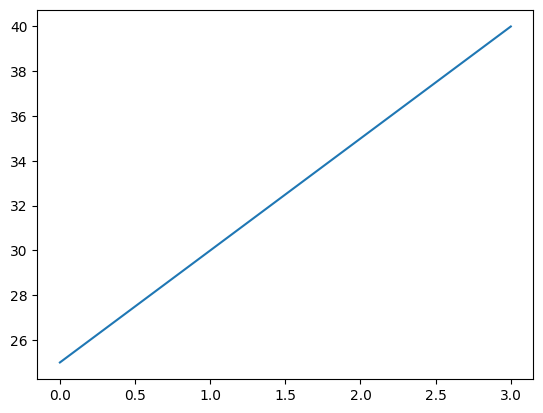

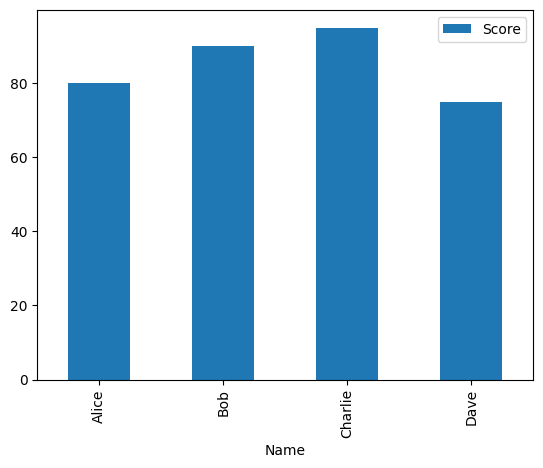

In [38]:
import matplotlib.pyplot as plt

# Simple line plot
df['Age'].plot(kind='line')
plt.show()

# Bar plot
df.plot(kind='bar', x='Name', y='Score')
plt.show()

## 13. Using Pandas in the Share Market Context
In the context of the stock market, Pandas is invaluable for fetching, analyzing, and visualizing financial data such as stock prices, volumes, and other financial metrics. You can integrate Pandas with financial APIs or services like Yahoo Finance to gather historical and real-time market data for analysis.

### Fetching Historical Stock Data

In [49]:
import yfinance as yf

# Fetch historical data for a stock, e.g., Apple Inc. (AAPL)
ticker = 'TataMotors.NS'
data = yf.download(ticker, start='2024-01-01', end='2024-10-01')
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-01  785.000000  798.700012  781.049988  790.599976  788.167725   
2024-01-02  800.500000  804.000000  779.000000  784.400024  781.986877   
2024-01-03  786.049988  790.000000  776.250000  781.450012  779.045959   
2024-01-04  798.000000  801.799988  791.299988  795.750000  793.301941   
2024-01-05  799.000000  805.900024  787.099976  790.950012  788.516724   

              Volume  
Date                  
2024-01-01  12570717  
2024-01-02  13791090  
2024-01-03   8559060  
2024-01-04  14298444  
2024-01-05  11091198  


 ## 14. Analyzing Daily Returns
Daily returns measure the percentage change in stock prices from one day to the next, providing insights into stock volatility.

<AxesSubplot:title={'center':'Daily Returns'}, ylabel='Frequency'>

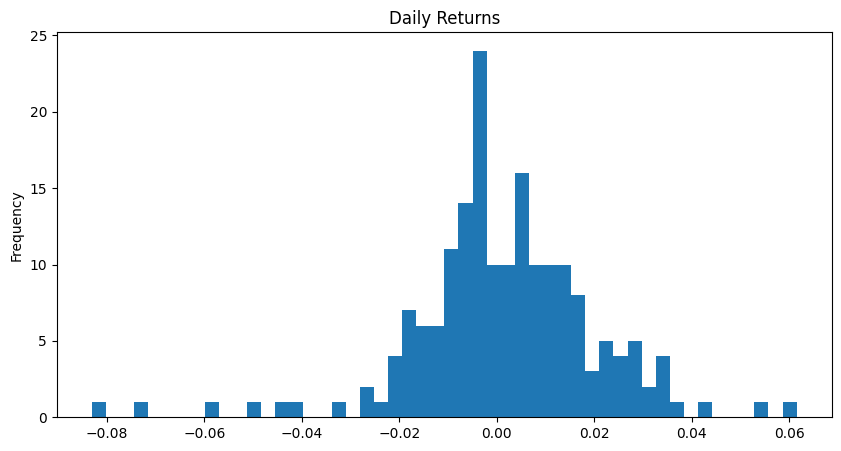

In [53]:
# Calculate daily returns using Pandas' pct_change function
data['Daily Return'] = data['Close'].pct_change()

# Plot the daily returns as a histogram
data['Daily Return'].plot(kind='hist', bins=50, figsize=(10,5), title="Daily Returns")


## 16. Stock Price Correlation
Correlation between stocks shows how closely their prices move together. You can analyze multiple stocks at once using Pandas.

[*********************100%%**********************]  3 of 3 completed


Ticker         RELIANCE.NS  TATAMOTORS.NS     ^NSEI
Ticker                                             
RELIANCE.NS       1.000000       0.703934  0.625994
TATAMOTORS.NS     0.703934       1.000000  0.659385
^NSEI             0.625994       0.659385  1.000000


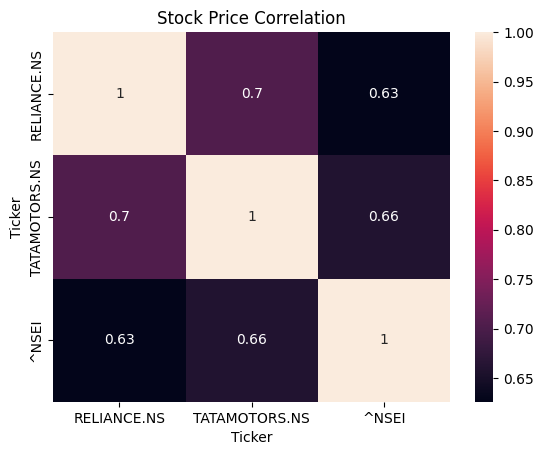

In [47]:
# Fetch historical data for multiple stocks (Apple and Microsoft)
tickers = ['Reliance.NS', 'TataMotors.NS','^NSEI']
data = yf.download(tickers, start='2024-01-01', end='2024-10-01')['Close']

# Calculate correlation matrix
correlation = data.corr()
print(correlation)

# Visualize the correlation matrix using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True)
plt.title("Stock Price Correlation")
plt.show()


## 17. Bollinger Bands Using Pandas
Bollinger Bands are used to identify overbought or oversold conditions in stock prices.



[*********************100%%**********************]  1 of 1 completed


<AxesSubplot:title={'center':'Bollinger Bands'}, xlabel='Date'>

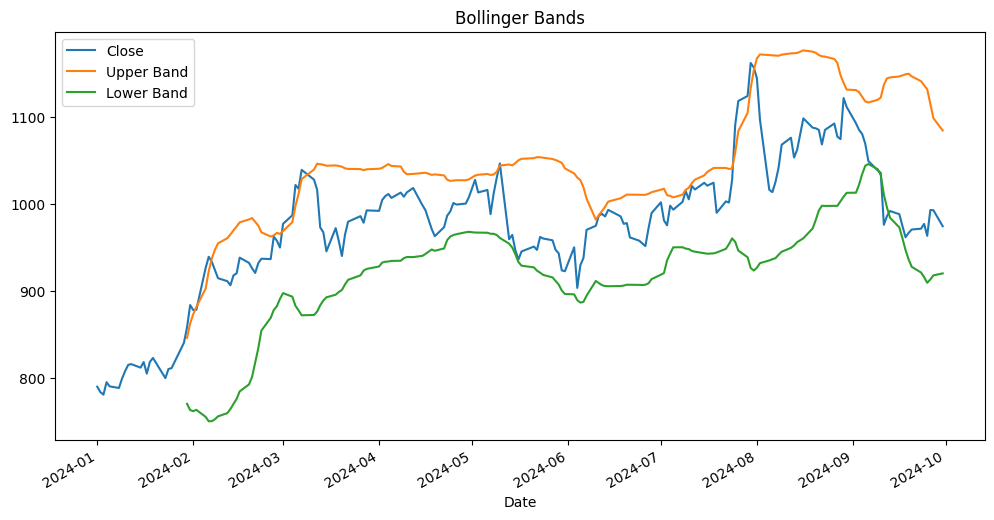

In [56]:
ticker = 'TataMotors.NS'
data = yf.download(ticker, start='2024-01-01', end='2024-10-01')

# Calculate 20-day moving average and standard deviation
data['MA20'] = data['Close'].rolling(window=20).mean()
data['20 Day STD'] = data['Close'].rolling(window=20).std()

# Calculate Upper and Lower Bollinger Bands
data['Upper Band'] = data['MA20'] + (2 * data['20 Day STD'])
data['Lower Band'] = data['MA20'] - (2 * data['20 Day STD'])

# Plot Close price with Bollinger Bands
data[['Close', 'Upper Band', 'Lower Band']].plot(figsize=(12,6), title="Bollinger Bands")


## 18. Resampling Stock Data for Different Time Frames

Pandas can resample data into different frequencies, such as weekly or monthly data, which can help in understanding trends over larger time frames.

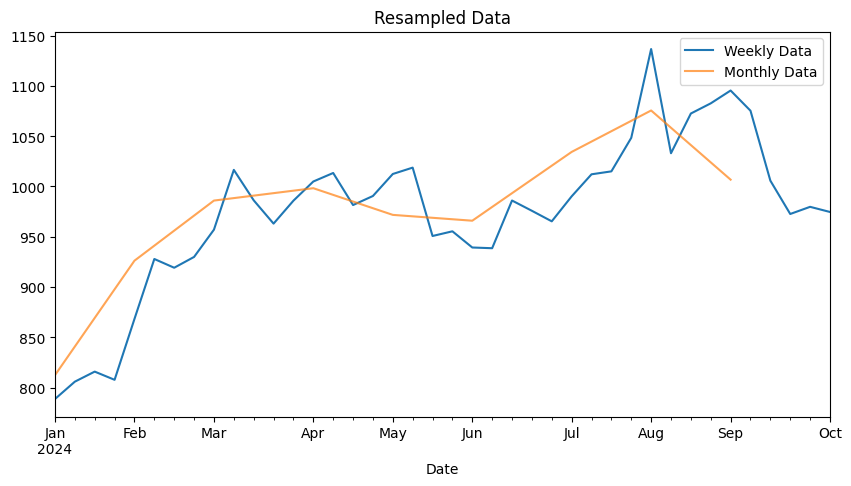

In [51]:
# Resample stock data to weekly and monthly frequency
weekly_data = data['Close'].resample('W').mean()
monthly_data = data['Close'].resample('M').mean()

# Plot weekly and monthly resampled data
weekly_data.plot(figsize=(10,5), label='Weekly Data', title="Resampled Data")
monthly_data.plot(figsize=(10,5), label='Monthly Data', alpha=0.7)
plt.legend()
plt.show()


Use Case in Share Market: Analyzing weekly or monthly data can help in long-term investing strategies by focusing on broader trends rather than daily fluctuations.

## 19. Analyzing Stock Volatility
Volatility is essential in the stock market to gauge risk. It measures how much the stock price fluctuates over time.

<AxesSubplot:title={'center':'Stock Volatility'}, xlabel='Date'>

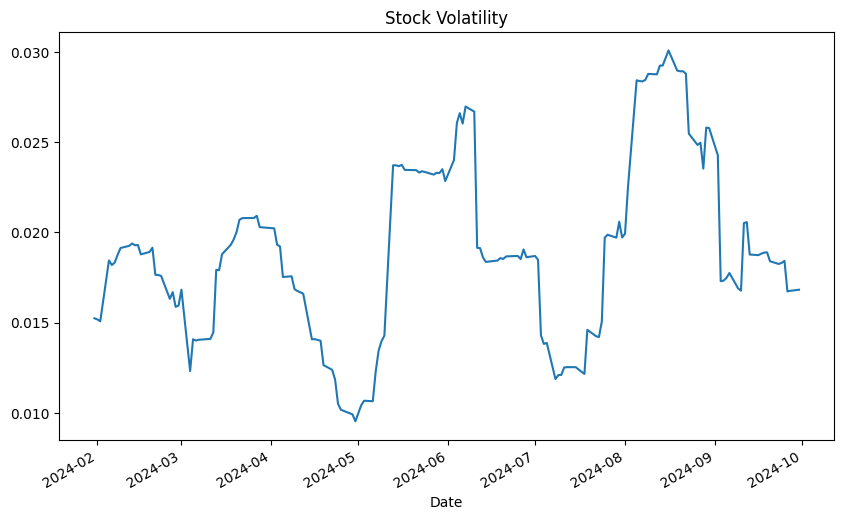

In [54]:
# Calculate rolling volatility using standard deviation of daily returns
data['Volatility'] = data['Daily Return'].rolling(window=20).std()

# Plot the stock volatility
data['Volatility'].plot(figsize=(10,6), title="Stock Volatility")


Volatility analysis helps in understanding the risk associated with a particular stock. Higher volatility typically indicates higher risk but also greater potential rewards.



## 20. Practice Exercises
1. Fetch the last 5 years of historical data for a stock of your choice (e.g., 'TSLA' for Tesla) using yfinance. Display the first 10 rows of the dataset.
2. After fetching stock data, check the following:
- The total number of rows and columns.
- The data types of each column.
- A summary of missing values in each column.
3. Compute the daily returns for the 'Close' price and add this as a new column in the DataFrame. Plot a histogram of the daily returns.
4. Calculate the 50-day and 200-day moving averages for the 'Close' price. Add them as new columns to the DataFrame and plot them along with the 'Close' price.
5. Plot the 'Close' price of the stock over the entire period of data you fetched. Add a title and labels to the chart.
6. Plot the stock's trading volume over time. Check for periods of high and low volume. What conclusions can you draw about price movement and volume?

